In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('cleaned_salary_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Hourly_salary,Employ_prov_salary,min_salary,max_salary,avg_salary,Company_txt,job_state,Age_of_company,python,R,excel,sql,spark,tableau,aws,hadoop
0,Data Scientist 1,$57K-$94K\n(Glassdoor Est.),"At NGL, we strive to make data-driven decision...",3.2,National Guardian Life Insurance Company\n3.2,"Madison, WI",-1,201 to 500 Employees,1909,Company - Private,Insurance Carriers,Insurance,$500 million to $1 billion (USD),-1,0,0,57,94,75.5,National Guardian Life Insurance Company,WI,111,0,1,1,0,0,1,0,0
1,"Data Scientist - Statistics, Early Career",$56K-$97K\n(Glassdoor Est.),*Organization and Job ID**\nJob ID: 310918\n\n...,3.8,PNNL\n3.8,"Richland, WA",-1,1001 to 5000 Employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),-1,0,0,56,97,76.5,PNNL,WA,55,0,1,1,0,0,0,0,0
2,AWS Data Lab Solution Architect,$90K-$143K\n(Glassdoor Est.),"· Highly technical and analytical, possessing ...",3.9,Amazon.com Services LLC\n3.9,"Seattle, WA",-1,10000+ Employees,1994,Company - Public,Internet,Information Technology,$10+ billion (USD),-1,0,0,90,143,116.5,Amazon.com Services LLC,WA,26,0,1,0,1,1,0,1,1
3,"Neurodegeneration Scientist, Neuroscience",$68K-$128K\n(Glassdoor Est.),150 million people worldwide are living with N...,4.0,Novartis\n4.0,"Cambridge, MA",-1,10000+ Employees,1996,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),-1,0,0,68,128,98.0,Novartis,MA,24,0,1,0,0,0,0,0,0
4,Data Engineer-Journeyman,$75K-$135K\n(Glassdoor Est.),The NAVAIR Digital Group leads the digital tra...,4.8,Sabre Systems\n4.8,"Patuxent River, MD",-1,201 to 500 Employees,1989,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,0,0,75,135,105.0,Sabre Systems,MD,31,0,1,1,0,0,0,0,0


### job title simplifications

In [4]:
#job title simplification
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'machine learning engineer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    elif 'scientist' in title.lower():
        return 'scientist'
    else:
        return 'na'

def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'junior' in title.lower() or 'early' in title.lower():
        return 'junior'
    else:
        return 'na'
    

In [5]:
df1 = df.copy()
df1['job_simplified'] = df['Job Title'].apply(title_simplifier)
df1['job_seniority'] = df['Job Title'].apply(seniority)
df1[['Job Title', 'job_simplified', 'job_seniority']]

,Job Title,job_simplified,job_seniority
0,Data Scientist 1,data scientist,na
1,"Data Scientist - Statistics, Early Career",data scientist,junior
2,AWS Data Lab Solution Architect,na,na
3,"Neurodegeneration Scientist, Neuroscience",scientist,na
4,Data Engineer-Journeyman,data engineer,na
5,Senior Genomic Data Scientist,data scientist,senior
6,R&D Scientist,scientist,na
7,Fungal Scientist,scientist,na
8,Scientist,scientist,na
9,Data Systems Analyst,analyst,na


In [6]:
df1['job_simplified'].value_counts()

data scientist               240
analyst                       89
scientist                     45
machine learning engineer     32
data engineer                 24
na                            23
manager                        7
director                       2
Name: job_simplified, dtype: int64

In [7]:
df1['job_seniority'].value_counts()

na        386
senior     71
junior      5
Name: job_seniority, dtype: int64

### job description length 

In [8]:
df1['descpn_lngth'] = df1['Job Description'].apply(lambda x: len(x))
df1[['descpn_lngth']].head()

,descpn_lngth
0,2432
1,5278
2,4752
3,3331
4,3029


In [9]:
#hourly wage to annual
df1['min_salary'] = df1.apply(lambda x: x.min_salary*2 if x.Hourly_salary ==1 else x.min_salary, axis = 1)
df1['max_salary'] = df1.apply(lambda x: x.max_salary*2 if x.Hourly_salary ==1 else x.max_salary, axis = 1)
df1['avg_salary'] = df1.apply(lambda x: x.avg_salary*2 if x.Hourly_salary ==1 else x.avg_salary, axis = 1)

df1[['Hourly_salary','min_salary', 'max_salary', 'avg_salary']].head(50)

,Hourly_salary,min_salary,max_salary,avg_salary
0,0,57,94,75.5
1,0,56,97,76.5
2,0,90,143,116.5
3,0,68,128,98.0
4,0,75,135,105.0
5,0,81,138,109.5
6,0,31,72,51.5
7,0,56,118,87.0
8,0,46,105,75.5
9,0,34,60,47.0


In [10]:
df1.describe()

,Rating,Headquarters,Founded,Competitors,Hourly_salary,Employ_prov_salary,min_salary,max_salary,avg_salary,Age_of_company,python,R,excel,sql,spark,tableau,aws,hadoop,descpn_lngth
count,462.000000,462.0,462.000000,462.0,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,3.766450,-1.0,1888.400433,-1.0,0.004329,0.006494,78.305195,128.519481,103.412338,39.690476,0.649351,0.766234,0.556277,0.571429,0.253247,0.238095,0.231602,0.188312,3926.673160
std,0.521116,0.0,414.721465,0.0,0.065724,0.080407,30.609923,44.564203,36.984510,41.377127,0.477691,0.423684,0.497361,0.495408,0.435342,0.426379,0.422313,0.391385,1540.684479
min,2.200000,-1.0,-1.000000,-1.0,0.000000,0.000000,18.000000,51.000000,37.500000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,941.000000
25%,3.400000,-1.0,1958.000000,-1.0,0.000000,0.000000,54.000000,94.000000,75.000000,13.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2866.750000
50%,3.800000,-1.0,1994.000000,-1.0,0.000000,0.000000,80.000000,129.000000,103.000000,24.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3702.500000
75%,4.100000,-1.0,2006.000000,-1.0,0.000000,0.000000,96.000000,152.000000,124.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4816.750000
max,5.000000,-1.0,2019.000000,-1.0,1.000000,1.000000,180.000000,286.000000,233.000000,338.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11609.000000


In [11]:
df2 = df1.copy()
df2 = df2.drop(['Headquarters','Competitors'], axis = 1)
df2.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue,Hourly_salary,Employ_prov_salary,min_salary,max_salary,avg_salary,Company_txt,job_state,Age_of_company,python,R,excel,sql,spark,tableau,aws,hadoop,job_simplified,job_seniority,descpn_lngth
0,Data Scientist 1,$57K-$94K\n(Glassdoor Est.),"At NGL, we strive to make data-driven decision...",3.2,National Guardian Life Insurance Company\n3.2,"Madison, WI",201 to 500 Employees,1909,Company - Private,Insurance Carriers,Insurance,$500 million to $1 billion (USD),0,0,57,94,75.5,National Guardian Life Insurance Company,WI,111,0,1,1,0,0,1,0,0,data scientist,na,2432


In [12]:
df2['Company_txt'].value_counts()

MITRE\r                                                 12
AstraZeneca\r                                            8
Twitter\r                                                5
Apple\r                                                  5
Intuit - Data\r                                          4
Amobee\r                                                 4
AstraZeneca                                              4
E3 Federal Solutions                                     4
Snap\r                                                   4
Shipt\r                                                  3
ENSCO, Inc.\r                                            3
E3 Federal Solutions\r                                   3
ClearEdge\r                                              3
C3.ai                                                    3
Square\r                                                 3
NJF Global Holdings\r                                    3
JM&A Group\r                                            

In [13]:
df2['Company_txt'] = df2['Company_txt'].apply(lambda x: x.replace('\r', ''))
df2['Company_txt'].value_counts()

MITRE                                                 14
AstraZeneca                                           12
E3 Federal Solutions                                   7
Snap                                                   6
Twitter                                                6
Maxar Technologies                                     6
PNNL                                                   6
Shipt                                                  5
C3.ai                                                  5
JM&A Group                                             5
Apple                                                  5
ClearEdge                                              4
Amyris                                                 4
Samsung Semiconductor, Inc.                            4
LSQ                                                    4
Amobee                                                 4
ENSCO, Inc.                                            4
Intuit - Data                  

In [14]:
df2.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly_salary', 'Employ_prov_salary',
       'min_salary', 'max_salary', 'avg_salary', 'Company_txt', 'job_state',
       'Age_of_company', 'python', 'R', 'excel', 'sql', 'spark', 'tableau',
       'aws', 'hadoop', 'job_simplified', 'job_seniority', 'descpn_lngth'],
      dtype='object')

<AxesSubplot:>

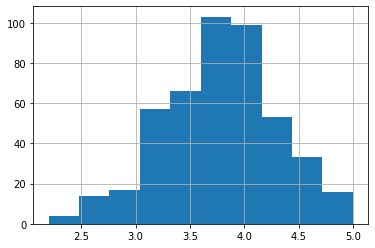

In [15]:
df2.Rating.hist()

<AxesSubplot:>

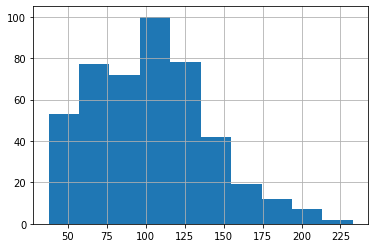

In [16]:
df2.avg_salary.hist()

<AxesSubplot:>

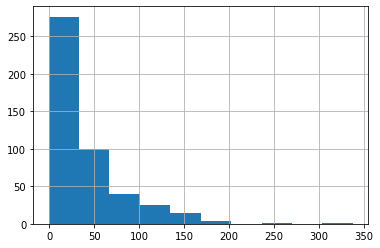

In [17]:
df2.Age_of_company.hist()

<AxesSubplot:>

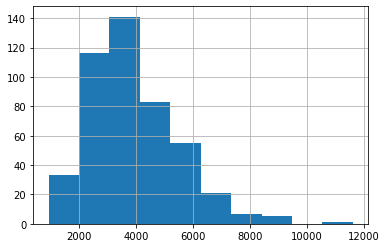

In [18]:
df2.descpn_lngth.hist()

<AxesSubplot:>

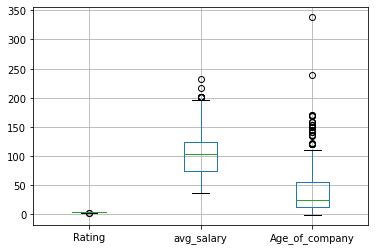

In [19]:
df2.boxplot(['Rating','avg_salary','Age_of_company'])

<AxesSubplot:>

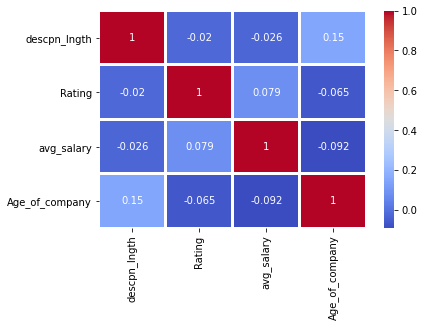

In [20]:
#plt.figure(figsize=(10,10))
sns.heatmap(df2[['descpn_lngth','Rating','avg_salary','Age_of_company']].corr(), annot = True, cmap ='coolwarm', linewidths=2)

In [21]:
df2.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Hourly_salary', 'Employ_prov_salary',
       'min_salary', 'max_salary', 'avg_salary', 'Company_txt', 'job_state',
       'Age_of_company', 'python', 'R', 'excel', 'sql', 'spark', 'tableau',
       'aws', 'hadoop', 'job_simplified', 'job_seniority', 'descpn_lngth'],
      dtype='object')

In [22]:
df_categ = df2[['Location', 'Size', 'Type of ownership','Industry', 'Sector', 'Revenue', 'Company_txt', 'job_state',
                'python', 'R', 'excel', 'sql', 'spark', 'tableau', 'aws', 'hadoop', 'job_simplified', 'job_seniority']]

graph for Location: total = 145


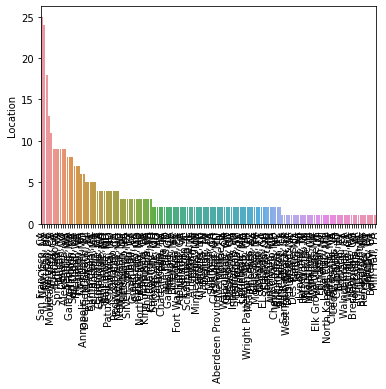

graph for Size: total = 7


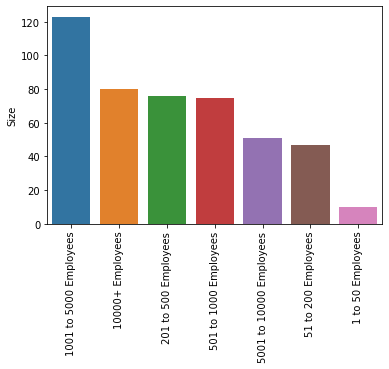

graph for Type of ownership: total = 7


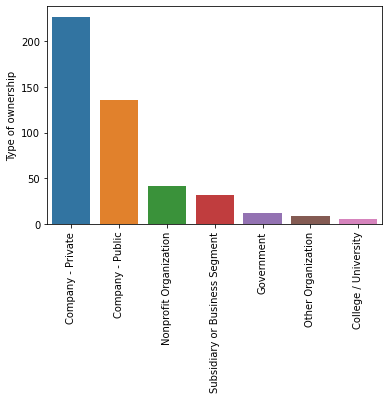

graph for Industry: total = 49


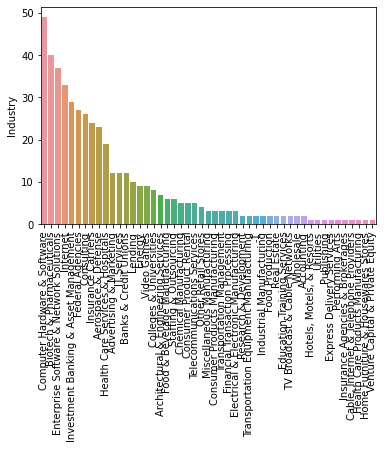

graph for Sector: total = 22


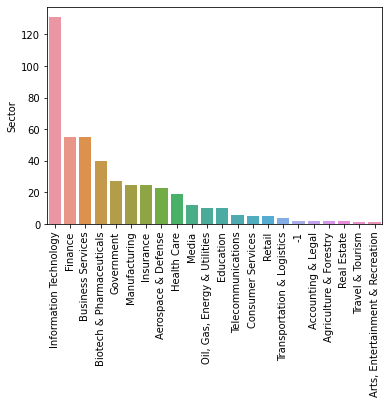

graph for Revenue: total = 13


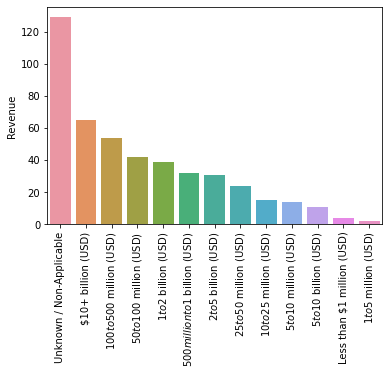

graph for Company_txt: total = 227


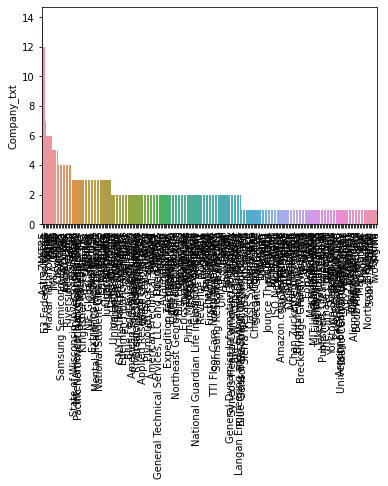

graph for job_state: total = 32


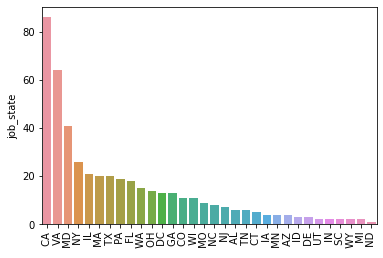

graph for python: total = 2


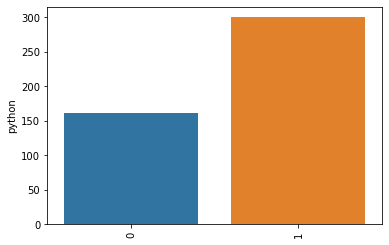

graph for R: total = 2


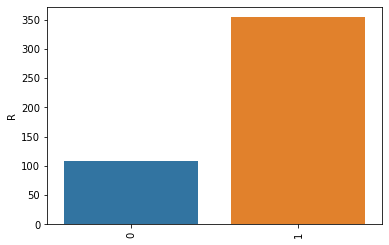

graph for excel: total = 2


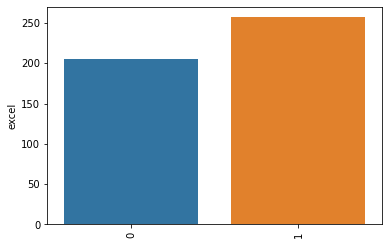

graph for sql: total = 2


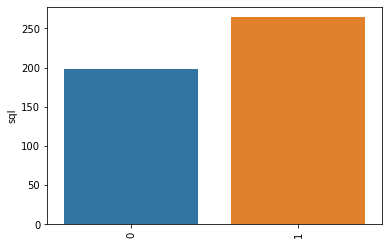

graph for spark: total = 2


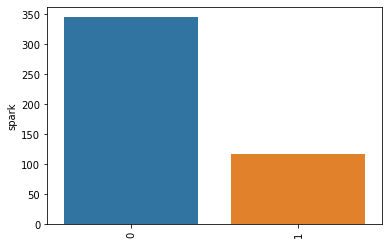

graph for tableau: total = 2


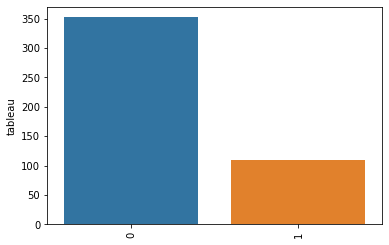

graph for aws: total = 2


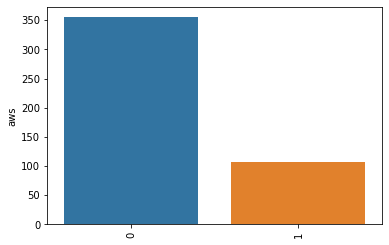

graph for hadoop: total = 2


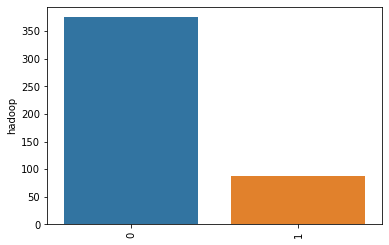

graph for job_simplified: total = 8


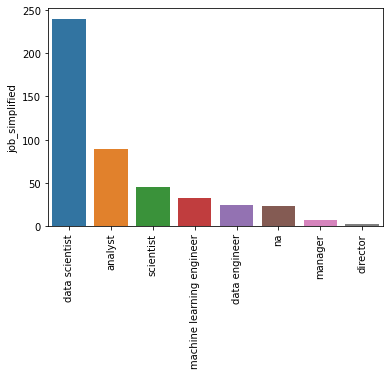

graph for job_seniority: total = 3


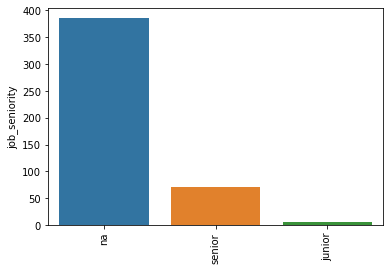

In [23]:
#plt.figure(figsize=(10,10))

for i in df_categ.columns:
    categ_num = df_categ[i].value_counts()
    print('graph for %s: total = %d' % (i, len(categ_num)))
    chart = sns.barplot(x = categ_num.index, y = categ_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


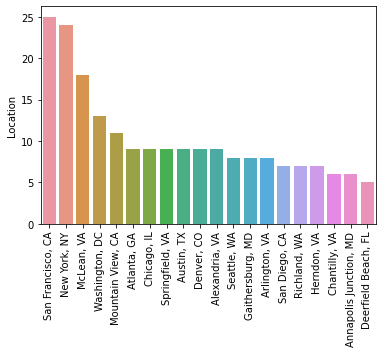

graph for Company_txt: total = 20


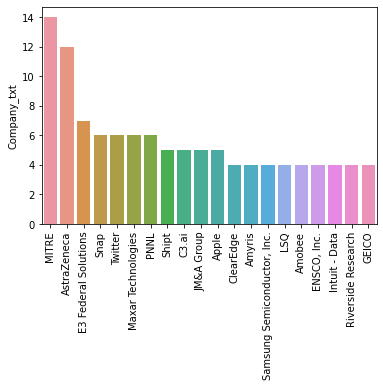

In [24]:
for i in df_categ[['Location','Company_txt']].columns:
     
    categ_num = df_categ[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i, len(categ_num)))
    chart = sns.barplot(x = categ_num.index, y = categ_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [25]:
pd.pivot_table(df2, index = 'job_simplified', values = 'avg_salary')

,avg_salary
job_simplified,
analyst,64.376404
data engineer,102.666667
data scientist,117.825000
director,75.000000
machine learning engineer,144.484375
manager,71.357143
na,97.608696
scientist,84.155556


In [26]:
pd.pivot_table(df2, index = ['job_simplified','job_seniority'] , values = 'avg_salary')

avg_salary
job_simplified            job_seniority            
analyst                   na              63.234940
                          senior          80.166667
data engineer             na              98.150000
                          senior         125.250000
data scientist            junior          75.500000
                          na             113.736842
                          senior         139.788889
director                  na              75.000000
machine learning engineer na             143.758621
                          senior         151.500000
manager                   na              65.833333
                          senior         104.500000
na                        na              99.523810
                          senior          77.500000
scientist                 na              73.285714
                          senior         122.200000

In [27]:
pd.pivot_table(df2, index = ['job_state', 'job_simplified'] , values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simplified                       
 WY       analyst                     60.000000
 WI       na                          77.000000
          manager                    107.500000
          data scientist             102.857143
 WA       scientist                  114.000000
          na                         116.500000
          data scientist              91.192308
 VA       data scientist             104.166667
          data engineer               96.000000
          analyst                     72.000000
          machine learning engineer  121.875000
          scientist                   55.500000
 UT       data scientist              94.500000
          data engineer               86.500000
 TX       data scientist             110.187500
          data engineer              109.000000
          analyst                     73.000000
 TN       scientist                   37.500000
          data scientist             109.000000
          analyst                     65.500000
 SC       scientist                   64.000000
          na                         132.000000
 PA       data scientist             107.000000
          analyst                     61.285714
          data engineer               75.500000
          na                          88.666667
          scientist                   71.625000
 OH       scientist                   83.800000
          data scientist             107.500000
          analyst                     48.000000
 NY       scientist                  118.500000
          manager                     56.500000
          machine learning engineer  154.500000
          data scientist             132.894737
          analyst                     58.000000
 NJ       analyst                     73.700000
          data scientist             122.250000
 ND       analyst                     54.000000
 NC       scientist                   66.000000
          manager                    104.500000
          data scientist             121.333333
          analyst                     49.000000
 MO       data scientist              98.500000
          analyst                     61.700000
 MN       data scientist              79.500000
          director                    75.000000
 MI       data engineer               78.500000
 MD       scientist                  116.400000
          na                          93.500000
          data scientist             121.886364
          data engineer              113.000000
          analyst                     75.000000
 MA       scientist                   86.625000
          na                         128.000000
          machine learning engineer  120.000000
          data scientist             119.038462
 IN       analyst                     47.000000
 IL       data engineer               92.500000
          analyst                     51.500000
          data scientist             102.318182
          scientist                   48.500000
 ID       scientist                   51.500000
          analyst                     48.000000
 IA       machine learning engineer   95.500000
          data engineer               89.500000
          analyst                     61.500000
 GA       analyst                     60.750000
          scientist                   75.500000
          machine learning engineer  125.000000
          data scientist             101.100000
 FL       data scientist              99.666667
          analyst                     68.777778
          manager                     74.500000
          na                         107.000000
 DE       data scientist             122.000000
 DC       na                          49.500000
          data scientist             116.187500
          data engineer              111.000000
          analyst                    122.000000
 CT       data scientist              86.500000
          analyst                     62.500000
 CO       data scientist             124.500000
     

In [28]:
pd.pivot_table(df2[df2.job_simplified == 'data scientist'], index = ['job_state'] , values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,146.481132
NY,132.894737
CO,124.500000
NJ,122.250000
DE,122.000000
MD,121.886364
NC,121.333333
MA,119.038462
DC,116.187500


In [29]:
df_pivots = df2[['Rating','Industry','Sector','Revenue','python','R','excel','sql','spark','tableau','aws',
                 'hadoop','avg_salary']]
for i in df_pivots.columns[:-1]:
    print(pd.pivot_table(df_pivots, index = i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

        avg_salary
Rating            
2.7     146.666667
4.5     129.942308
3.0     119.250000
3.9     117.637500
4.0     117.625000
4.2     112.523810
3.2     112.379310
4.8     105.812500
4.7     105.500000
3.5     103.923077
2.2     103.000000
3.8     101.500000
2.5     100.666667
3.6      98.115385
3.7      96.045455
2.8      95.000000
4.9      93.666667
3.4      93.574074
5.0      92.500000
3.3      90.842105
4.4      90.217391
4.1      89.500000
4.6      87.300000
2.6      85.600000
4.3      85.277778
2.9      79.785714
3.1      73.888889
2.4      72.500000
                                         avg_salary
Industry                                           
Other Retail Stores                      150.375000
Venture Capital & Private Equity         147.000000
Transportation Equipment Manufacturing   145.500000
Insurance Agencies & Brokerages          135.000000
Telecommunications Services              133.900000
Computer Hardware & Software             133.540816
Internet      

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import punkt

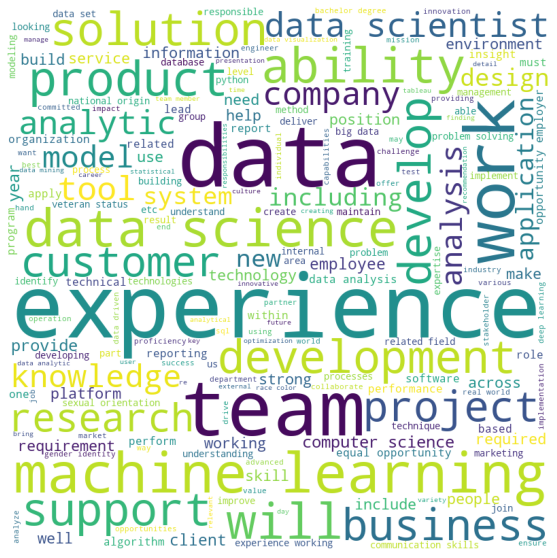

In [31]:
df3 = df2.copy()
df3['Job Description'] = df3['Job Description'].apply(lambda x: x.lower().replace('\n', ' ').replace('*', ' '))

comment_words = '' 
stopwords = set(STOPWORDS) 

# iterate through the csv file 
for val in df3['Job Description']: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wc = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords,
                max_words = 2000).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wc) 
plt.axis("off") 
  
plt.show() 